<a href="https://colab.research.google.com/github/radzmi/STQD-6014-Data-Science-P131663/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

In the modern contemporary world, standardized examination have become pivotal metrics for evaluating students' academic proficiency. This assessments play a crucial role in institutional desicion-making. Educators these days must have the ability to examine various factor that influence a student academic performance. This will help educators and policymakers to better understand and predict the academic performance in the future.  

# **Problem Statements**

In this analysis, we want to examine factors that influecing the students' performance in a test. Factor such as gender, parental education level and ethnicity are used in this analysis.

# **Exploratory Data Analysis**

In [ ]:
# Download the ex1.csv file here: http://tinyurl.com/jnv8tdvf

In [ ]:
# load library
# Matplotlib and seaborn are for visualization purpose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount to Google Drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Upload StudentsPerformance.csv to Google Drive
from google.colab import files
data = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (1).csv


In [ ]:
# Read the CSV file into a DataFrame
path = '/content/StudentsPerformance.csv'

df = pd.read_csv(path)

In [ ]:
# Displaying first few rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Check if the there is missing data in the dataset
# There is no missing data
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# Inspect for any duplicates in dataset
df.duplicated().sum()

0

In [ ]:
# Inspect each columns name
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# Inspect the types of each columns
# Every column has correct types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [ ]:
# Create a new column 'overall_score' by summing the scores from 'math score', 'reading score', and 'writing score'
df['overall_percentage'] = round((df['math score'] + df['reading score'] + df['writing score']) / 3, 1)

# Show the first 5 rows of the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7
1,female,group C,some college,standard,completed,69,90,88,82.3
2,female,group B,master's degree,standard,none,90,95,93,92.7
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3
4,male,group C,some college,standard,none,76,78,75,76.3


In [ ]:
# Overall score result
pass_mark = 50

df['overall_result'] = np.where(df['overall_percentage'] < pass_mark, 'F', 'P')

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_percentage,overall_result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.7,P
1,female,group C,some college,standard,completed,69,90,88,82.3,P
2,female,group B,master's degree,standard,none,90,95,93,92.7,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.3,F
4,male,group C,some college,standard,none,76,78,75,76.3,P


# **Result and Discussion**

# **Bar Plot**
**Percentage of Pass and Fail Students**

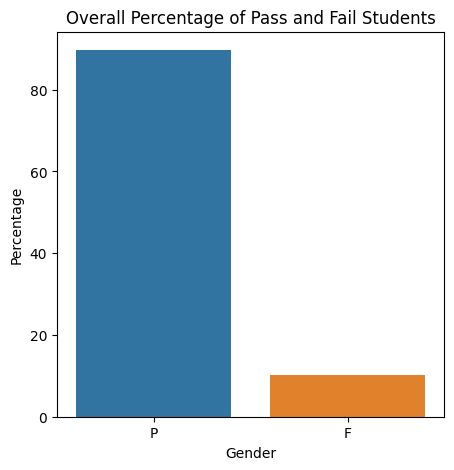

In [ ]:
# Plot Pass Students
result_counts = df["overall_result"].value_counts()
result_pct = result_counts/ len(df) * 100      # Changing the plot to percentage value

plt.figure(figsize=(5,5)) # Setting the figure size
sns.barplot(x = result_pct.index,
            y = result_pct.values)
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Overall Percentage of Pass and Fail Students")
plt.show()

From this Bargraph, we can see that more than 80% student pass all three subjects. Almost 10% of total students who are failed in the test. We can conclude that most of the student pass the exam with flying colors. This group of student that perform really well in the test that indicates a bright future.

# **Bar Plot**
**Distribution of Ethnicity**

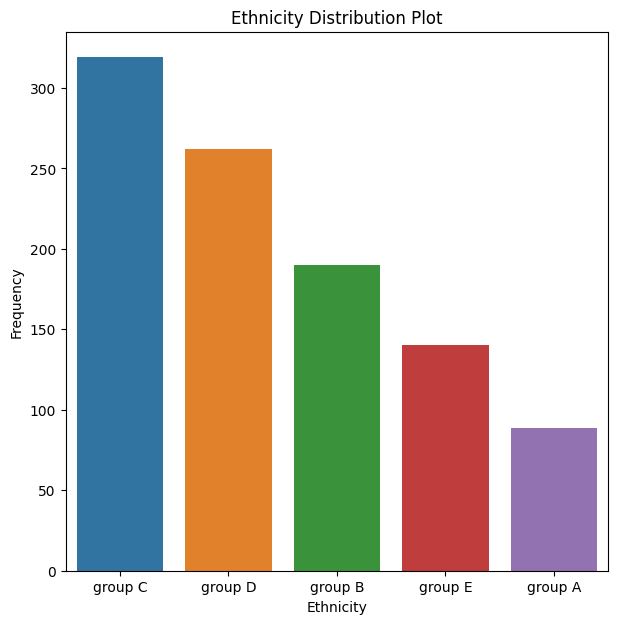

In [ ]:
# Race/Ethinicity Plot
plt.figure(figsize=(7,7)) # Setting figure size
sns.barplot(x=df["race/ethnicity"].value_counts().index,  # Plot the index(name of each group) of race/ethnicity columns on the x-axis
            y=df['race/ethnicity'].value_counts().values) # Plot the values of race/ethnicity columns on the y-axis
plt.xlabel('Ethnicity') # Labelling x-axis
plt.ylabel('Frequency')  # Labelling y-axis
plt.title('Ethnicity Distribution Plot') # Changing title of the plot
plt.show()

This plot shows the distribution of ethnicity who are taking the test. We can see that the test are dominated by ethnicity from group C(blue) followed by group D(orange). Group A(purple) has the least amount of student taking up the exam. This analysis may be bias towards the majority group as there is no generalizaton occur. It is recomended to generalize the data first before attempting to build any model.

# **Grouped Bar Plot**
**Parental Level of Education**

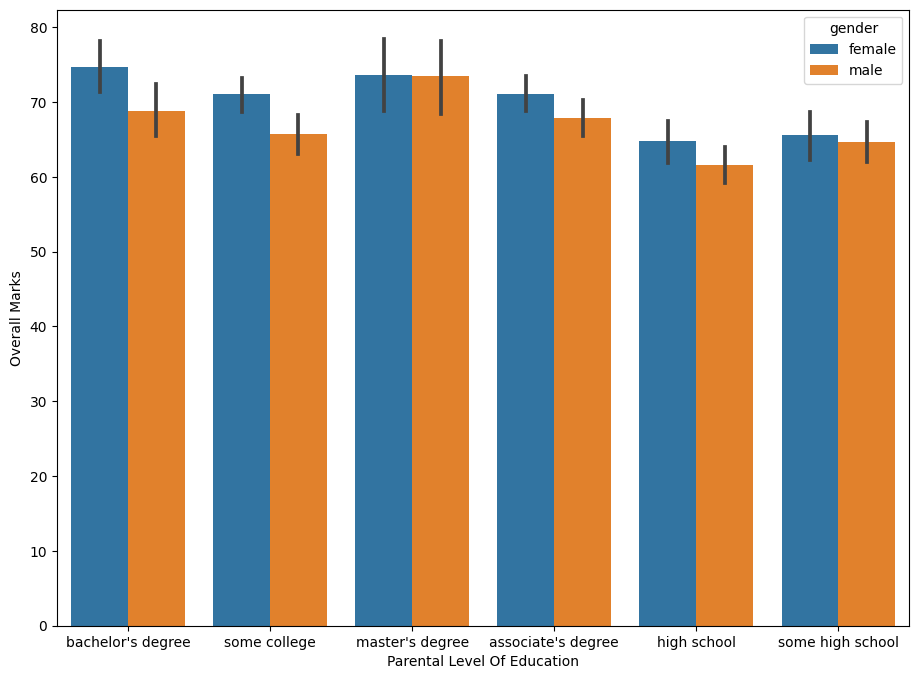

In [ ]:
# Parental level of education
plt.figure(figsize= (11,8))
sns.barplot(x = 'parental level of education', y = 'overall_percentage', hue = 'gender', data = df)
plt.xlabel('Parental Level Of Education')
plt.ylabel('Overall Marks')
plt.show()

From the group barplot above, we can conclude the parents level of education have an impact on overall marks of a student. Student who have parents that has a master's degree, score the highest overall marks in the test while student's parent who are high school graduates score lower than any one else. Other than that, we also can see that master's degree group have an almost similar achivements between gender while the other groups, male will always score lower than female.

# **Pie Chart**
**Percentage of Pass Students**

([<matplotlib.patches.Wedge at 0x7d4f4bd80550>,
 [Text(-0.04763151574892026, 1.0989682610100533, 'female'),
  Text(0.04763161864175401, -1.0989682565504642, 'male')],
 [Text(-0.02598082677213832, 0.5994372332782107, '51.4%'),
  Text(0.025980882895502187, -0.5994372308457077, '48.6%')])

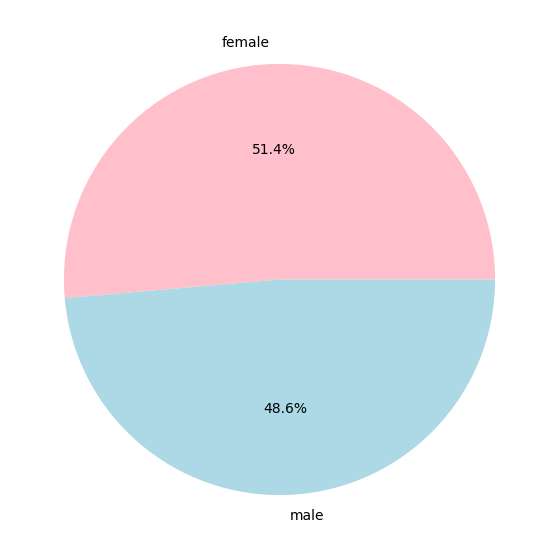

In [ ]:
# Pie Chart
labels = df["gender"].value_counts().index # Labels for each category
colors = ['pink','lightblue'] # colors for pie chart
values = df.groupby('gender')['overall_percentage'].mean() # Values taken into the piechart


plt.figure(figsize=(7,7))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%') # autopct is to set the values of data into one decimal places

Fron the pie chart above, we can see that female students have a higher overall marks compare to male students. 52% of female score higher than male in the test. This pie chart also corresponding with previous grouped bar plot where female always perform better than men

# **Box Plot**
**Overall Score by Ethnicity**


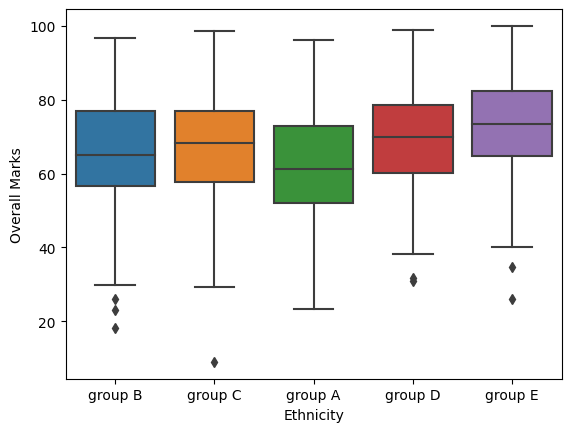

In [ ]:
# Boxplot
sns.boxplot(x =df['race/ethnicity'], y=df['overall_percentage'], dodge= False) # dogge = False is to plot each bar on top of each other
plt.xlabel("Ethnicity")
plt.ylabel("Overall Marks")
plt.show()

In this boxplot, we examine overall score for each ethnicity. From the results, group C has an outlier. The outlier is the lowest overall marks in the test. Group A has no outlier. Group B has the most outlier with 3. Group E has the best mean of the overall marks while group A has the worst mean. Adding to the worst mean of overall marks, group A also has the lowest student frequecy(bar plot of ethnicity distribution). This shows that group A perform the worst in this test compare to the other group. Form this boxplot, there is no significant evidence that shows ethnicity influnce student performance.  

#**Conclusion**

In conclusion, from the three factors that been examine in this analysis, only 2 factors that shows a strong evidence that impacting students' performance. Ethnicity shows no evidence to impact a student performance. From 5 different ethnicity groups, all of them perform almost the same in this test. For gender, female student perform better than male students. We can see that female students have more pass percentage compare to male students and female students also score higher in overall marks. This maybe due to male students discipline problems (reference 1). The last factor is parental level of education. From the analysis, a higher parental level of education produce a better students performance. Parents who graduated from high school produce a poorer students overall. This maybe due to family enviroment that impact the students behavior. As shown in this study conducted by Aqsa Shoukat (reference 2)




**Reference 1**
Ismail Orabi 2007. Gender Differences In Student Academic Performance And Attitudes. 2007 Annual Conference & Exposition. https://peer.asee.org/gender-differences-in-student-academic-performance-and-attitudes


**Reference 2**
Aqsa Shoukat, Maryam Ilyas, Rabbia Azam, & Abid Hussain Ch. 2012. Impact of Parent's Education on Children's Academic Performance. Secondary Education Journal, Vol. 2, No. 1: 53-59. http://pu.edu.pk/images/journal/secondary/PDF/4_Aqsa%20&%20Maryam_v2_issue1.pdf